<div style="text-align: center;">
    <h1><strong><u>TMDB Project</u></strong><h1>
</div>

### AIM: 
   Investigate how **revenue**, **popularity** and **budget** interact in the genre of animation films

<img src = "https://images.unsplash.com/photo-1513106580091-1d82408b8cd6?q=80&w=2952&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="600"/>

## 1. Importing Libraries and Datasets

> The dataset being imported is a dataset sourced from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) and is available for download from the [TMDB webstie](https://developer.themoviedb.org/docs/getting-started).

In [1611]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [1612]:
# Import data
df = pd.read_csv("TMDB_movies.csv")

## 2. Cleaning the Data

In [1614]:
# Exploring the data
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Editing the Formatting of Genre Column

The genres column required formatting adjustments to enable analysis.

In [1617]:
# Extract genres from each data point
def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Genres
    return Genres

In [1618]:
## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [1619]:
# Creating dataframe that separates list of genres for each film into new column
film_genres = df.explode('extracted_genres').copy() 

### Null Values
When examining the null values in the dataset, the **homepage** and **tagline** columns stand out with a significant number of missing entries. This is likely because these details are either optional or not applicable for certain films. We assume these omissions were intentional. We will not be using these columns in this analysis therefore will leave them untreated.

Other columns with nulls include:
- **overview**: Three films lack an overview, likely due to human error. While it's possible to research and input this information manually, it may be challenging to ensure accuracy without reliable sources and again this information is not necessary for this analysis.
- **running time**: Two films are missing their running times. This information is usually publicly available, so filling in these gaps is feasible.
- **release date**: One film is missing its release date. Since release dates are generally well-documented, this could also be researched and added.

In [1621]:
# Calculating percent of nulls
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
keywords,0,0.000
id,0,0.000
genres,0,0.000
budget,0,0.000
popularity,0,0.000


**Filling 'Runtime' Null Values**

I confidently entered these **runtime** values based on information sourced online. 

> References for the two runtime values inputted:
> - ['Chiamatemi Grancesco - Il Papa della gente'](https://www.imdb.com/title/tt3856124/)
> - ['To Be Frank, Sinatra at 100'](https://www.imdb.com/title/tt4704314/)

In [1624]:
# Checking records with missing runtimes
df[df['runtime'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,[Drama]
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,[Documentary]


In [1625]:
# Fill the Runtime NaN's
runtime_nulls = df[df['runtime'].isnull()] #create file for nulls
df.loc[runtime_nulls.iloc[0].name, 'runtime'] = 98 #assign first null value to 98 mins - sourced from the internet
df.loc[runtime_nulls.iloc[1].name, 'runtime'] = 81 #assign second null value to 81 mins- sourced from the internet

In [1626]:
# Checking both are now correct
df[df['original_title'] == 'Chiamatemi Francesco - Il Papa della gente']
df[df['original_title'] == 'To Be Frank, Sinatra at 100']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,2015-12-12,0,81.0,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,[Documentary]


**Dropping 'Release_date' Null Value** 

After further investigation of the null value in the **release_date** column, I discovered that most values in the corresponding row were missing. As a result, I decided to remove this record from the dataset.

In [1629]:
# Checking records with missing release date
df[df['release_date'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0,[]


In [1630]:
# Dropping data from release_date where NA
df.dropna(axis = 0, #drop rowwise
          how = 'any', #drop if any value in row is null
          subset = ['release_date'], #specifically in release_date column
          inplace = True)

**Checking Null Values have Successfully Changed**

In columns:
- Runtime ✅
- Release Date ✅

In [1632]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

null_vals(df)

,null,percent
homepage,3090,64.348
tagline,843,17.555
overview,3,0.062
budget,0,0.000
genres,0,0.000
keywords,0,0.000
id,0,0.000
original_title,0,0.000
original_language,0,0.000
production_companies,0,0.000


### Exploring the Data

- Dataset has **4803 films**.
- 2 movies have been remade and therefore repeat:
> 1. _Batman_ - first made in 1966 then remade in 1989
> 2. _Out of the Blue_ - first made in 1980 then remade in 2006
- 261 occasions where the title did not match original title

In [1635]:
# Overall data stats
df.describe(include = 'all')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
count,4.802000e+03,4802,1712,4802.000000,4802,4802,4802,4799,4802.000000,4802,...,4802,4.802000e+03,4802.000000,4802,4802,3959,4802,4802.000000,4802.000000,4802
unique,NaN,1175,1691,NaN,4222,37,4800,4799,NaN,3697,...,3280,NaN,NaN,544,3,3944,4799,NaN,NaN,1175
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,Ever since the second grade when he first saw ...,NaN,[],...,2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Out of the Blue,NaN,NaN,[Drama]
freq,NaN,370,4,NaN,411,4504,2,1,NaN,350,...,10,NaN,NaN,3171,4794,3,2,NaN,NaN,370
mean,2.905109e+07,NaN,NaN,57098.234902,NaN,NaN,NaN,NaN,21.496776,NaN,...,NaN,8.227777e+07,106.890879,NaN,NaN,NaN,NaN,6.093440,690.361724,NaN
std,4.072447e+07,NaN,NaN,88581.302370,NaN,NaN,NaN,NaN,31.818451,NaN,...,NaN,1.628697e+08,22.560354,NaN,NaN,NaN,NaN,1.191496,1234.674268,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000372,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,8.000000e+05,NaN,NaN,9013.750000,NaN,NaN,NaN,NaN,4.671734,NaN,...,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000,NaN
50%,1.500000e+07,NaN,NaN,14626.500000,NaN,NaN,NaN,NaN,12.924931,NaN,...,NaN,1.917498e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.500000,NaN
75%,4.000000e+07,NaN,NaN,58589.750000,NaN,NaN,NaN,NaN,28.332017,NaN,...,NaN,9.291920e+07,117.750000,NaN,NaN,NaN,NaN,6.800000,737.000000,NaN


In [1636]:
# Total rows and columns in data
df.shape

(4802, 21)

In [1637]:
# Two duplicates in the data
df['original_title'].unique()
unique_names = set(df['original_title'])
len(unique_names) 

4800

In [1638]:
# Discovering which movies had been remade/duplicated
df['counts'] = df.groupby('original_title')['original_title'].transform('count')
df[df['counts']>1]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,counts
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...",...,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096,"[Fantasy, Action]",2
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]",...,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17,[Drama],2
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],...,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18,[Drama],2
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,"[Family, Adventure, Comedy, Science Fiction, C...",2


In [1639]:
# 261 occasions where title did not match original title
df[df['title'] != df['original_title']]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,counts
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...",...,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143,"[Action, Adventure, Drama, Horror, Science Fic...",1
215,130000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,1979,"[{""id"": 657, ""name"": ""fire""}, {""id"": 720, ""nam...",en,4: Rise of the Silver Surfer,The Fantastic Four return to the big screen as...,60.810723,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,289047763,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Discover the secret of the Surfer.,Fantastic 4: Rise of the Silver Surfer,5.4,2589,"[Adventure, Fantasy, Action, Thriller]",1
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...",...,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471,"[Fantasy, Adventure, Comedy, Family]",1
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...",...,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187,"[Drama, History, War]",1
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...",...,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47,"[Mystery, Drama, Horror]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,344466,[],ro,Lumea e a mea,Larisa is 16 and lives in a city by the sea. I...,0.327622,[],...,0,104.0,"[{""iso_639_1"": ""ro"", ""name"": ""Rom\u00e2n\u0103""}]",Released,NaN,The World Is Mine,0.0,0,[Drama],1
4719,120000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,40652,"[{""id"": 1965, ""name"": ""sandstorm""}, {""id"": 151...",fr,Une femme mariée: Suite de fragments d'un film...,"Charlotte is young and modern, not a hair out ...",1.112792,"[{""name"": ""Orsay Films"", ""id"": 2325}, {""name"":...",...,0,95.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,She Loves Two Men... She is Married to One!,The Married Woman,7.1,20,"[Drama, Romance]",1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2,"[Drama, Romance]",1
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...",...,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06.

In [1640]:
# Correlation plot between numeric columns
df.corr(numeric_only = True)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,counts
budget,1.000000,-0.088963,0.505364,0.730806,0.269932,0.092644,0.593148,-0.014151
id,-0.088963,1.000000,0.031760,-0.050113,-0.151329,-0.267822,-0.003710,-0.014291
popularity,0.505364,0.031760,1.000000,0.644700,0.225532,0.273990,0.778114,-0.006961
revenue,0.730806,-0.050113,0.644700,1.000000,0.251298,0.197153,0.781475,0.003645
runtime,0.269932,-0.151329,0.225532,0.251298,1.000000,0.371916,0.272156,0.000140
vote_average,0.092644,-0.267822,0.273990,0.197153,0.371916,1.000000,0.313263,0.006824
vote_count,0.593148,-0.003710,0.778114,0.781475,0.272156,0.313263,1.000000,-0.002499
counts,-0.014151,-0.014291,-0.006961,0.003645,0.000140,0.006824,-0.002499,1.000000


## 3. Key Finding 1: What Genre had the Highest Average Revenue and Why?

To determine which genre has the highest average revenue, we will **compare the average revenue** across different film genres. 

<img src = "https://images.unsplash.com/photo-1526304640581-d334cdbbf45e?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width = 500/>

In [1644]:
# Dataframe grouping films of the same genre together and averaging their mean
genre_revenues = film_genres.groupby('extracted_genres')[['revenue']]\
                            .mean()\
                            .sort_values(by = 'revenue', ascending= False)\
                            .head(10)

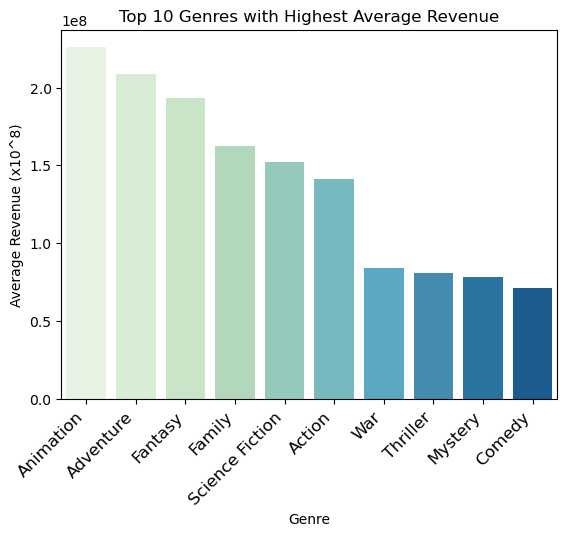

In [1645]:
# Barplot for Film Genres with Highest Average Revenue
sns.barplot(data = genre_revenues, #dataframe with film genres split up for each film
            x = 'extracted_genres', 
            y = 'revenue',
            hue='extracted_genres',
            palette = 'GnBu')

plt.xlabel('Genre')
plt.ylabel('Average Revenue (x10^8)')
plt.xticks( rotation = 45,
		horizontalalignment='right',
		fontweight='light',
		fontsize = 'large')

plt.title('Top 10 Genres with Highest Average Revenue')
plt.show()

When investigating which genres had the highest average revenue we see that the top three inlcuded:

- **Animation**
- **Adventure**
- **Fantasy**

> Suggesting these genres consistently performed well and had strong audience interest.


### Why did the genre of Animation have the highest average revenue?

Next I wanted to investigate what factors may have contributed to the genre of animation having the <u>highest average revenue</u>.
Some factors I wanted to explore included:
>- 1) **BUDGET** - The financial investment behind animation films.
>- 2) **POPULARITY** - How well-known and loved animation films are with audiences.

<img src = "https://images.unsplash.com/photo-1592475609592-5185f62cfb34?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width = 400/>

#### 1. **BUDGET**: 

The graph below displays the top 10 genres that have the <u>highest average budget</u>. 

As shown in the graph below, films classified under the **animation** genre have the **highest average budget**. 
> - This suggests that higher budgets may contribute to attracting a **more renowned cast**, use **better filming equipment**, and overall improve production quality — factors that likely make the film more appealing to a broader audience.
> - Since the genre of animation had the highest average budget and revenue - we can predict that there may be some correlation between these two factors.

In [1650]:
# Dataframe for Genres with highest budget
genre_budget = film_genres.groupby('extracted_genres')[['budget']].mean().sort_values(by = 'budget', ascending= False).head(10)

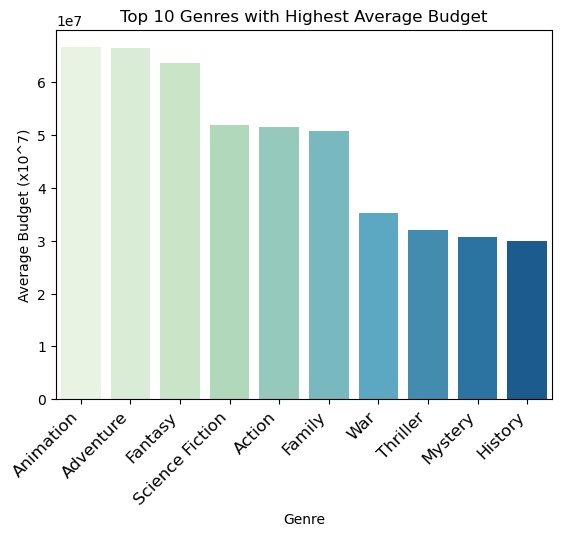

In [1651]:
# Barplot for Genres with the Highest Average Budget
sns.barplot(data = genre_budget, 
            x = 'extracted_genres', 
            y = 'budget',
            hue='extracted_genres',
            palette = 'GnBu')

plt.xlabel('Genre')
plt.ylabel('Average Budget (x10^7)')
plt.xticks( rotation = 45,
		horizontalalignment='right',
		fontweight='light',
		fontsize = 'large')


plt.title('Top 10 Genres with Highest Average Budget')
plt.show()

#### 2. **POPULARITY** 

The graph below displays the top 10 genres with the <u>highest average popularity</u>.

As shown in the graph, **animation films** did **NOT** have the **highest average popularity**; they came in a close second.

> This suggests that films with higher revenues may not always be the most popular.


In [1653]:
# Dataframe for Genres with highest popularity
genre_popularity = film_genres.groupby('extracted_genres')[['popularity']].mean().sort_values(by = 'popularity', ascending= False).head(10)

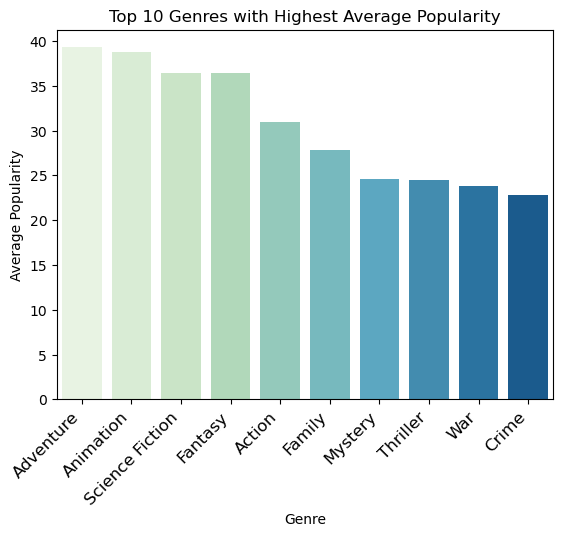

In [1654]:
# Barplot for Genres with highest popularity
sns.barplot(data = genre_popularity, 
            x = 'extracted_genres', 
            y = 'popularity',
            hue='extracted_genres',
            palette = 'GnBu')

plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks( rotation = 45,
		horizontalalignment='right',
		fontweight='light',
		fontsize = 'large')


plt.title('Top 10 Genres with Highest Average Popularity')
plt.show()

### Quantitative Analysis: Impact of **Budget** and **Popularity** on Film Revenue

In this analysis, I wanted to quantitatively explore how **budget** and **popularity** influence the **revenue** of films across all genres. By examining these factors, we aim to identify trends and relationships that could explain the variations in film revenue and will provide insight into whether higher budgets or increased popularity directly correlate with higher revenue.


#### <u>Correlation Matrix</u>

This graph shows the following correlations:

- **Relatively Strong Correlation** between **Budget** and **Revenue**: 73.1%
- **Moderate Correlation** between **Popularity** and **Revenue**: 64.5%

> This suggests that while **budget** plays a significant role in determining revenue, **popularity** may also contribute, but to a lesser extent.
> 
> This finding is reflected in the example of the **Animation** genre, where we observed that while animation had the highest revenue and budget, it came in second for popularity.


In [1657]:
# Dataframe for correlation of budget, popularity, and revenue
df_corr=df[['budget','popularity','revenue']].copy()

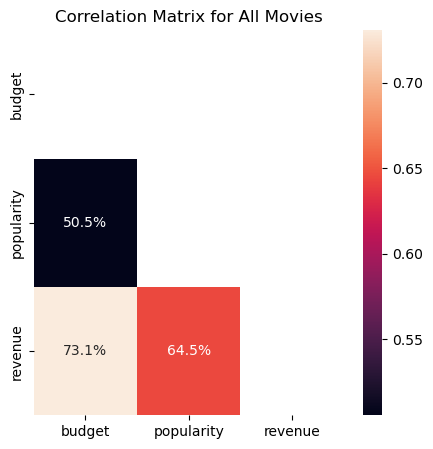

In [1658]:
# Correlation matrix for animation movies
plt.figure(figsize = (5,5))
sns.heatmap(df_corr.corr(numeric_only = True),
           cmap = 'rocket',  #colour mapping
           annot = True,     #annotations
           fmt = '.1%',      #level of precision for number
           mask = np.triu(df_corr.corr(numeric_only=True))) #masking half table
plt.title('Correlation Matrix for All Movies')
plt.show()

## 6. Key Finding 2: Impact of Release Date on Film Revenue

### Investigating the Impact of Release Dates on Film Revenue

To determine whether release dates have an impact on revenues, we will investigate the top 10 highest revenue **animation films**, ordered by their release dates.

Prior to this analysis, my two theories were:

1. **Older films** may have higher revenue due to a longer period to accumulate earnings.
2. **Newer films** may have higher revenue due to advances in technology or greater audience reach.

However, as shown in the graph below, _no clear trends_ emerged regarding release dates impacting the revenue of these specific films.

> Key observations:
> - **Toy Story 3** had the largest revenue in this dataset.
> - Two of the four **Ice Age** movies in the dataset were among the top 10 highest revenue films.


In [1661]:
# Dataset with top 10 highest revenue animation films
top_10_animation = film_genres[film_genres['extracted_genres'] == 'Animation'].sort_values(by = 'revenue', ascending = False).head(10)

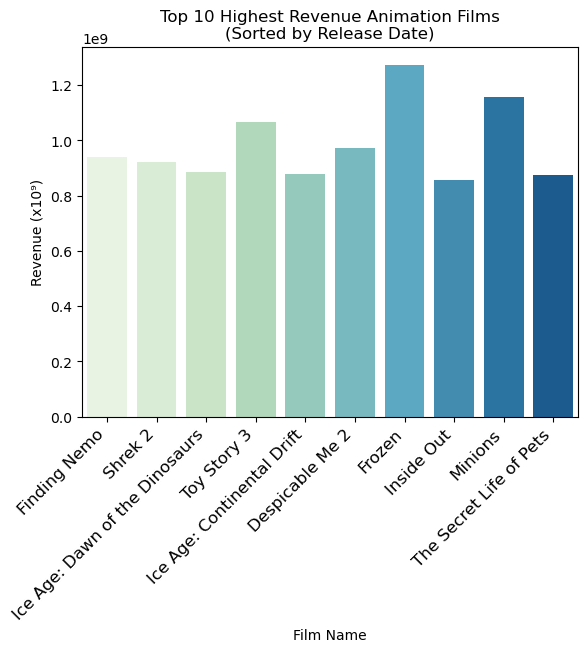

In [1662]:
# Barplot showing top 10 highest revenue animation films
sns.barplot(data = top_10_animation.sort_values(by = 'release_date'), 
            x = 'title', 
            y = 'revenue',
            palette = 'GnBu',
            hue = 'title') 

plt.xlabel('Film Name')
plt.ylabel('Revenue (x10⁹)')
plt.xticks( rotation = 45,
		horizontalalignment='right',
		fontweight='light',
		fontsize = 'large')
plt.title('Top 10 Highest Revenue Animation Films\n(Sorted by Release Date)')
plt.show()

### Why Might There Be No Clear Trend Between Release Dates and Revenue?

There are several possible reasons why release dates may not show a clear trend in impacting the revenue of the top 10 highest-grossing animation films:

> 1. **Technological Advances**: While newer films benefit from more advanced technology and animation techniques, these films were likely at the forefront of their field at the time of release. As a result, the appeal of the films may have been consistent, regardless of the year they were released.

> 2. **Inflation**: Over time, inflation affects both film production costs and ticket prices. This could mask any trends in the data, as the revenue for older films may appear lower, even though they performed similarly to newer films when adjusted for inflation. To investigate this further, it would be useful to examine how inflation impacted the industry during this period.

These factors likely contribute to the variability in revenue, making it difficult to draw a definitive correlation between release dates and revenue.

### Movie Comparison - *Ice Age* Movies

After observing that two of the *Ice Age* films ranked among the top 10 highest revenue movies, I wanted to investigate how **budget** and **popularity** interacted with the success of these films.

The dataset includes details of four *Ice Age* movies, so I expanded my analysis to compare all four films in the series.

<img src = "https://media.istockphoto.com/id/1056742552/photo/woolly-mammoth-prehistoric-animal-in-frozen-ice-age-landscape.jpg?s=612x612&w=0&k=20&c=vp5xPhyR1e_rOZ5dagdUhdclYOXFf98HmeYRxIe6B3g="/>

To explore how **budget** impacted the success of these films, I compared the budget of each *Ice Age* movie over time.

In [1667]:
# Dataset filtered for ice age films
ice_age_films = df[df['title'].str.contains('Ice Age')]

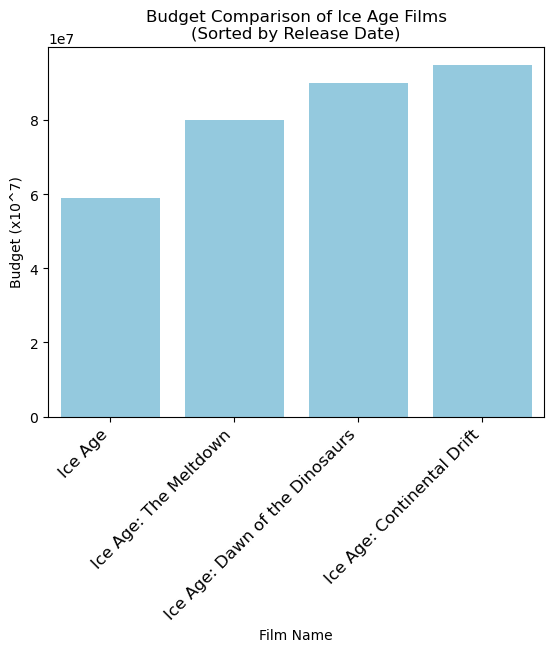

In [1668]:
# Barplot comparing budgetd for the ice age films
sns.barplot(data=ice_age_films.sort_values(by = 'release_date'), 
            x='title', 
            y='budget', 
            color='skyblue')

plt.xticks( rotation = 45,
		horizontalalignment='right',
		fontweight='light',
		fontsize = 'large')

plt.ylabel('Budget (x10^7)')
plt.xlabel('Film Name')

plt.title('Budget Comparison of Ice Age Films\n(Sorted by Release Date)')
plt.show()

#### How Did the Budget Compare Between the *Ice Age* Movies?

The budget comparison between the *Ice Age* films reveals these trends:

> 1. **Increased Budgets Over Time**: The budget for each successive *Ice Age* film generally increased, reflecting the growing scale of production, improved animation technology, and higher marketing costs. 
   
> 2. **Higher Initial Investment**: The first *Ice Age* film had a comparatively lower budget, likely because it was a new franchise and the financial risk was higher. However, as the franchise became more successful, the budgets for later films grew significantly.


### Comparing Popularity Across the Ice Age Film Series: Does Later Release Date Mean Less Popular?

To further investigate how **popularity** changed with each subsequent release, I compared the popularity of each *Ice Age* film over time.

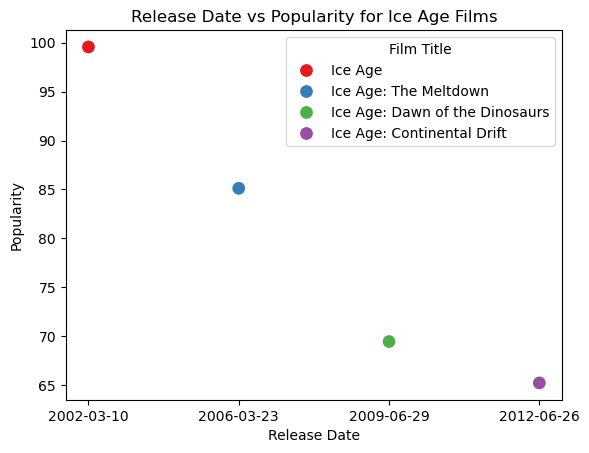

In [1671]:
# Scatterplot of runtime vs popularity of ice age film
sns.scatterplot(data=ice_age_films.sort_values(by = 'release_date'), 
                x='release_date', 
                y='popularity', 
                hue='title', 
                palette='Set1', s=100)

# Add labels and title
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Release Date vs Popularity for Ice Age Films')
plt.legend(title='Film Title')
plt.show()

### Why Was the First *Ice Age* Film the Most Popular?

There are several reasons why the first *Ice Age* movie may have been the most popular:

> 1. **Introduction to the Franchise**: The first film often has the advantage of being a fresh, new concept. Audiences were drawn to the idea of prehistoric animals navigating a changing world - attracting a wide audience of families and children.

> 2. **Lower Competition in the Early 2000s**: Released in 2002, the original *Ice Age* came at a time when animated films were less prevalent, so may have had less competition.

> 3. **First in the Series**: Over time, sequels often struggle to capture the same level of interest.


## 7. Summary of Findings

- Key finding 1: The **Animation** genre achieved the **highest revenue**, likely due to having the largest budgets among all genres.
- Key finding 2: _Release Date_ did not appear to impact the revenue of the top 10 highest-grossing animation films.
- Movie Comparison Finding: Despite increasing budgets, the popularity of the *Ice Age* films **decreased** over time.